# Titanic Analysis

## Importation des bibliothèques nécessaires

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Chamrgement des données

In [77]:
file_path = 'data/data.csv'
dataset = pd.read_csv(file_path)

### Affichage des premières lignes des données

In [78]:
print("\nPremières lignes du dataset :\n")
print(dataset.head())


Premières lignes du dataset :

   Unnamed: 0  PassengerId  Survived  Pclass  \
0           0            1         0       3   
1           1            2         1       1   
2           2            3         1       3   
3           3            4         1       1   
4           4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3   

### Informations générales sur le dataset

In [79]:
print("\nInformations sur le dataset :\n")
print(dataset.info())


Informations sur le dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   886 non-null    int64  
 1   PassengerId  886 non-null    int64  
 2   Survived     886 non-null    int64  
 3   Pclass       886 non-null    int64  
 4   Name         886 non-null    object 
 5   Sex          886 non-null    object 
 6   Age          709 non-null    float64
 7   SibSp        886 non-null    int64  
 8   Parch        886 non-null    int64  
 9   Ticket       886 non-null    object 
 10  Fare         886 non-null    float64
 11  Cabin        202 non-null    object 
 12  Embarked     884 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.1+ KB
None


### Statistiques descriptives

In [80]:
print("\nStatistiques descriptives :\n")
print(dataset.describe())


Statistiques descriptives :

       Unnamed: 0  PassengerId    Survived      Pclass         Age  \
count  886.000000   886.000000  886.000000  886.000000  709.000000   
mean   445.860045   446.860045    0.383747    2.309255   29.677250   
std    256.647193   256.647193    0.486572    0.836501   14.555826   
min      0.000000     1.000000    0.000000    1.000000    0.420000   
25%    224.250000   225.250000    0.000000    2.000000   20.000000   
50%    446.500000   447.500000    0.000000    3.000000   28.000000   
75%    667.750000   668.750000    1.000000    3.000000   38.000000   
max    890.000000   891.000000    1.000000    3.000000   80.000000   

            SibSp       Parch        Fare  
count  886.000000  886.000000  886.000000  
mean     0.524831    0.383747   32.249044  
std      1.105177    0.807819   49.790784  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.895800  
50%      0.000000    0.000000   14.456250  
75%      1.000000    0.000000  

### Documentation des colonnes

In [81]:
columns_info = {
    'PassengerId': "Identifiant unique du passager",
    'Survived': "Indique si le passager a survécu (1) ou non (0)",
    'Pclass': "Classe du billet (1 = Première, 2 = Deuxième, 3 = Troisième)",
    'Name': "Nom complet du passager",
    'Sex': "Genre du passager",
    'Age': "Âge du passager",
    'SibSp': "Nombre de frères/soeurs/conjoints à bord",
    'Parch': "Nombre de parents/enfants à bord",
    'Ticket': "Numéro du billet",
    'Fare': "Tarif payé pour le billet",
    'Cabin': "Numéro de cabine (s'il est disponible)",
    'Embarked': "Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton)"
}
print("\nDocumentation des colonnes :\n")
for column, description in columns_info.items():
    print(f"- {column}: {description}")


Documentation des colonnes :

- PassengerId: Identifiant unique du passager
- Survived: Indique si le passager a survécu (1) ou non (0)
- Pclass: Classe du billet (1 = Première, 2 = Deuxième, 3 = Troisième)
- Name: Nom complet du passager
- Sex: Genre du passager
- Age: Âge du passager
- SibSp: Nombre de frères/soeurs/conjoints à bord
- Parch: Nombre de parents/enfants à bord
- Ticket: Numéro du billet
- Fare: Tarif payé pour le billet
- Cabin: Numéro de cabine (s'il est disponible)
- Embarked: Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton)


## Visualisation des données

****Création des graphiques**** :

### Graphique 1 : Répartition des survivants par sexe

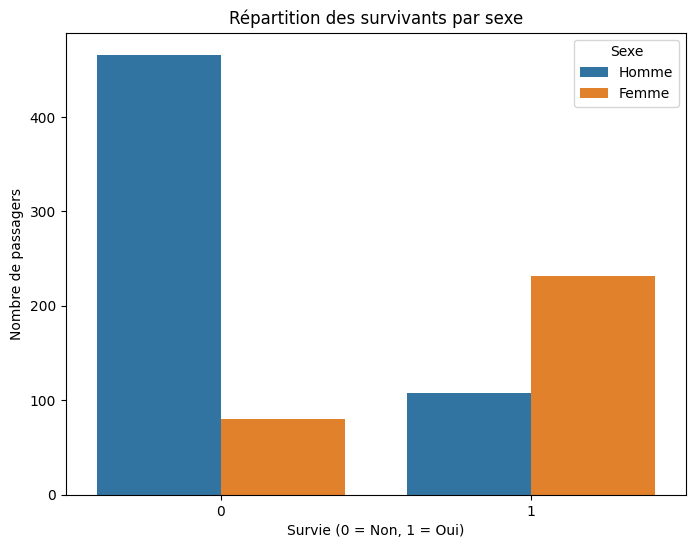

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Survived', hue='Sex')
plt.title("Répartition des survivants par sexe")
plt.xlabel("Survie (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de passagers")
plt.legend(title="Sexe", labels=['Homme', 'Femme'])
plt.show()

#### Explication du graphique 1

**Explication** : Le graphique montre que les femmes ont survécu en plus grand nombre que les hommes. Cela peut refléter des priorités de secours lors de l'évacuation, où les femmes et les enfants étaient souvent priorisés.

### Graphique 2 : Distribution des âges

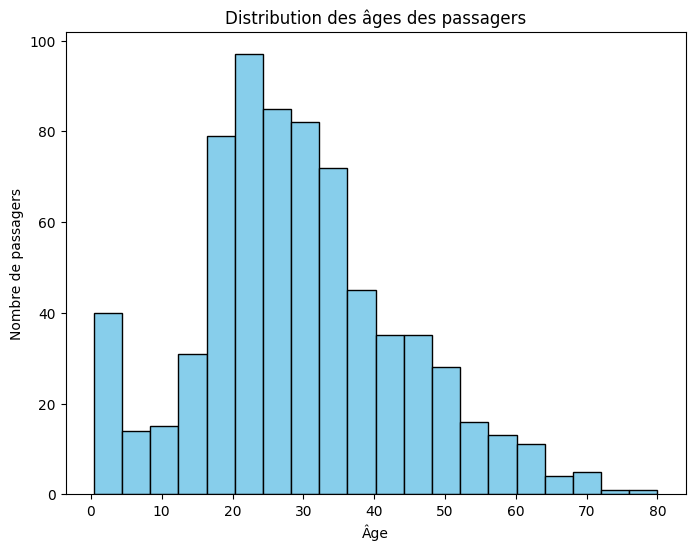

In [83]:
plt.figure(figsize=(8, 6))
dataset['Age'].dropna().plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution des âges des passagers")
plt.xlabel("Âge")
plt.ylabel("Nombre de passagers")
plt.show()

#### Explication du graphique 2

**Explication** : La répartition montre que la troisième classe contient le plus grand nombre de passagers, suivie par la première et la deuxième. Cela peut refléter la diversité des profils socio-économiques à bord du Titanic.

### Graphique 3 : Répartition des classes

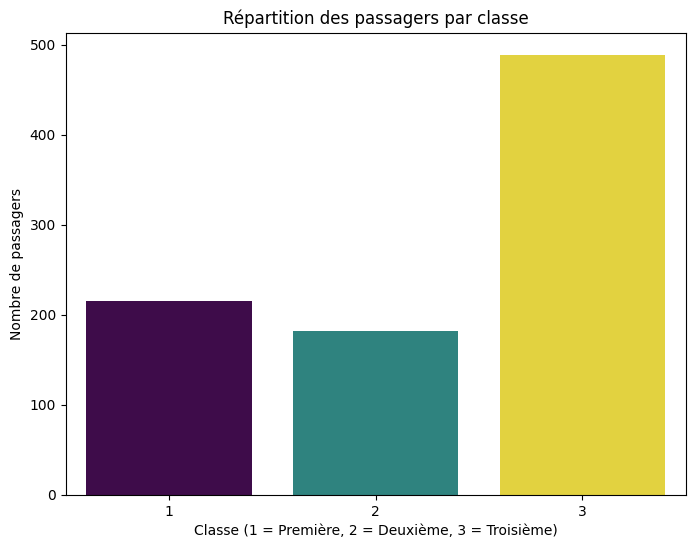

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Pclass', hue='Pclass', palette='viridis', legend=False)
plt.title("Répartition des passagers par classe")
plt.xlabel("Classe (1 = Première, 2 = Deuxième, 3 = Troisième)")
plt.ylabel("Nombre de passagers")
plt.show()

#### Explication du graphique 3

**Explication** : La répartition montre que la troisième classe contient le plus grand nombre de passagers, suivie par la première et la deuxième. Cela peut refléter la diversité des profils socio-économiques à bord du Titanic.

### Observations des graphiques

1. Répartition des survivants par sexe : Les femmes ont survécu en plus grand nombre que les hommes, 
   ce qui reflète potentiellement les priorités lors de l'évacuation.
2. Distribution des âges : La majorité des passagers avaient entre 20 et 40 ans, mais on observe également
   des enfants et des personnes âgées.
3. Répartition des classes : La troisième classe contient le plus grand nombre de passagers, 
   tandis que la première classe est la moins représentée.

## Préparation des données pour le Machine Learning

In [85]:
from sklearn.preprocessing import LabelEncoder

### Gestion des valeurs manquantes

In [86]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())  # Imputation de l'âge par la médiane
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])  # Imputation du port d'embarquement par la valeur la plus fréquente

### Encodage des variables catégorielles

In [87]:
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])  # Encodage de 'Sex' (0 = femme, 1 = homme)
dataset = pd.get_dummies(dataset, columns=['Embarked'], drop_first=True)  # Encodage one-hot de 'Embarked'

### Suppression des colonnes non pertinentes pour le modèle

In [88]:
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### Résumé des transformations

In [89]:
print("\nDataset après transformation :\n")
print(dataset.head())


Dataset après transformation :

   Unnamed: 0  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  \
0           0         0       3    1  22.0      1      0   7.2500       False   
1           1         1       1    0  38.0      1      0  71.2833       False   
2           2         1       3    0  26.0      0      0   7.9250       False   
3           3         1       1    0  35.0      1      0  53.1000       False   
4           4         0       3    1  35.0      0      0   8.0500       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


#### Commentaires sur les transformations

1. Les valeurs manquantes dans 'Age' ont été remplacées par la médiane pour éviter de biaiser les données.
2. Les valeurs manquantes dans 'Embarked' ont été remplacées par la valeur la plus fréquente (mode).
3. La variable 'Sex' a été transformée en une valeur numérique (0 = femme, 1 = homme) pour être utilisable par les algorithmes.
4. Les variables catégorielles comme 'Embarked' ont été encodées avec une méthode one-hot, ce qui évite de créer une hiérarchie artificielle.
5. Les colonnes non pertinentes comme 'PassengerId', 'Name', 'Ticket', et 'Cabin' ont été supprimées car elles n'apportent pas d'information utile pour la prédiction.
6. Le dataset contient désormais des colonnes binaires ou numériques uniquement, prêtes pour un algorithme de Machine Learning.

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Division des données en ensembles d'entraînement et de test

In [91]:
X = dataset.drop('Survived', axis=1)  # Caractéristiques
y = dataset['Survived']  # Cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Entraînement du modèle avec Random Forest

In [92]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Évaluation du modèle

In [93]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("\nPrécision du modèle :", accuracy)


Précision du modèle : 0.7921348314606742


#### Rapport de classification

In [94]:
report = classification_report(y_test, predictions)
print("\nRapport de classification :\n", report)


Rapport de classification :
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       100
           1       0.77      0.76      0.76        78

    accuracy                           0.79       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.79      0.79      0.79       178



1. Le modèle Random Forest a atteint une précision de 79 %, ce qui est une performance solide pour un modèle initial.
2. La classe 0 (non survivants) a un F1-score de 0.81, indiquant une bonne capacité à détecter les passagers qui n'ont pas survécu.
3. La classe 1 (survivants) a un F1-score de 0.76, légèrement inférieur, ce qui peut refléter un léger déséquilibre dans la prédiction des survivants.
4. Des ajustements comme le réglage des hyperparamètres ou l'équilibrage des classes pourraient améliorer les résultats.
5. Le modèle est un bon point de départ, mais une optimisation supplémentaire est nécessaire pour améliorer la précision globale.

## Matrice de confusion

In [95]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

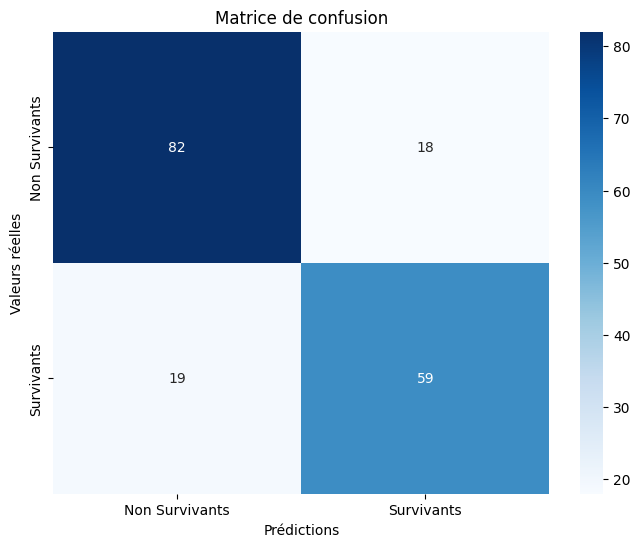

In [114]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non Survivants", "Survivants"], yticklabels=["Non Survivants", "Survivants"])
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

#### Observations sur la mise à l'échelle

1. La précision globale du modèle est de 79 %, indiquant une performance correcte.
2. La matrice de confusion montre :
   - 82 non-survivants correctement identifiés.
   - 59 survivants correctement identifiés.
   - 18 faux positifs (non-survivants classés à tort comme survivants).
   - 19 faux négatifs (survivants classés à tort comme non-survivants).
3. Ces erreurs, notamment les faux négatifs, peuvent être critiques si l'objectif est de minimiser les erreurs sur les survivants.
4. Pour réduire ces erreurs :
   - Augmenter la complexité du modèle en ajustant les hyperparamètres (par exemple, profondeur maximale des arbres, nombre d'arbres).
   - Rééquilibrer les classes pour mieux gérer les déséquilibres.
   - Tester des algorithmes alternatifs comme XGBoost ou LightGBM.
5. Ce modèle peut être amélioré en fonction des priorités définies (précision globale ou réduction des erreurs critiques).


## Mise à l'échelle des données

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Entraînement du modèle avec les données mises à l'échelle

In [99]:
model_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
model_scaled.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Évaluation du modèle avec mise à l'échelle

In [100]:
predictions_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, predictions_scaled)
print("\nPrécision du modèle avec mise à l'échelle :", accuracy_scaled)


Précision du modèle avec mise à l'échelle : 0.7921348314606742


### Matrice de confusion avec mise à l'échelle

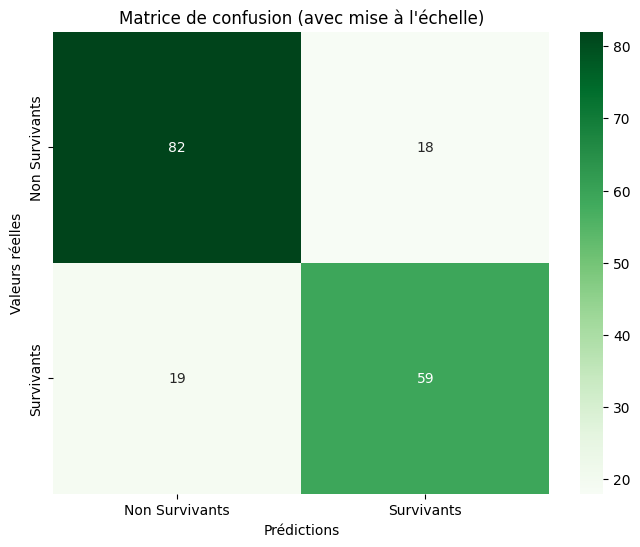

In [101]:
conf_matrix_scaled = confusion_matrix(y_test, predictions_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_scaled, annot=True, fmt="d", cmap="Greens", xticklabels=["Non Survivants", "Survivants"], yticklabels=["Non Survivants", "Survivants"])
plt.title("Matrice de confusion (avec mise à l'échelle)")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

#### Observations sur la mise à l'échelle
1. La précision du modèle sans mise à l'échelle est de 79,21 %, identique à celle obtenue après mise à l'échelle.
2. La matrice de confusion montre des résultats identiques avant et après mise à l'échelle :
   - 82 non-survivants correctement prédits.
   - 59 survivants correctement prédits.
   - 18 faux positifs (non-survivants classés comme survivants).
   - 19 faux négatifs (survivants classés comme non-survivants).
3. La mise à l'échelle n'a pas d'impact sur les forêts aléatoires, car cet algorithme est insensible à l'échelle des données.
4. Cette étape reste pertinente pour d'autres algorithmes comme les SVM ou les régressions logistiques, qui sont très sensibles à l'échelle des caractéristiques.